## Importing cleaned csv file
 The file has:
                  -> removed username starting from @ (eg: @ram)
                  -> removed links (https links)
                  -> removed emojis
                  -> removed newline character (\n)

In [1]:
import os
import glob
import pandas as pd
import numpy as np
from gensim.models import TfidfModel

df = pd.read_csv('../cleaning/5.removed_newline.csv')
# columns = df.columns.tolist()
df.head()

,Unnamed: 0,text
0,0,नेकपा एमाले निकै शक्तिशाली देखियो। तराजुमा उ ए...
1,1,विचारको हिसाबले म नेपाली काङ्ग्रेस हुनुपर्ने ह...
2,2,म पवित्र छू भोट हालेको छैन घामे हरुले नै हाले...
3,3,वडासदस्यका उम्मेदवारको मृत्युपछि श्रीमतीले दिइ...
4,4,"एमाले कुहिएको फर्सी हो, छोएपनि रोग लाग्छ : माध..."


In [2]:
# !pip install pystemmer
import Stemmer
stemmer = Stemmer.Stemmer('nepali')
# stemmer.stemWords(nepali_list)
print(df['text'][1])
df['text'] = df['text'].apply(lambda x: stemmer.stemWord(x))
print(df['text'][1])

विचारको हिसाबले म नेपाली काङ्ग्रेस हुनुपर्ने हो तर त्यो आतंककारी मर्या सिनो माओवादीलाई काॅध थाप्ने काङ्ग्रेसलाई कदापि भोट हाल्न सकिन्न ।
विचारको हिसाबले म नेपाली काङ्ग्रेस हुनुपर्ने हो तर त्यो आतंककारी मर्या सिनो माओवादीलाई काॅध थाप्ने काङ्ग्रेसलाई कदापि भोट हाल्न सकिन्न ।


In [3]:
def remove_punctuation(text):
    punc = '''!()-[]{};:'"\,।<>./|?@#$%^&*_~'''
    for str in text:
        if str in punc:
            text = text.replace(str, "")

    return text

# Apply the function to remove punctuations from the 'Sentences' column
df['text'] = df['text'].apply(remove_punctuation)

print(df['text'][0])

नेकपा एमाले निकै शक्तिशाली देखियो तराजुमा उ एक्लै एकातिर पाँच दल अर्को तिर एक्लै हुँदा पनि झन् झन् लोकपृय झन् झन् भारी हुदैछ एमाले


In [4]:
import re
def remove_stopwords(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in nepali_stopwords]
    return ' '.join(filtered_sentence)

def remove_numbers(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in numbers]
    return ' '.join(filtered_sentence)
def remove_english(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() if  re.findall("[\u0900-\u097F]+",word)]
    return ' '.join(filtered_sentence) 

with open('../nepali_stopwords.txt','r') as file:
    lines = file.readlines()

with open('../numbers.txt','r') as file:
    lines2 = file.readlines()

nepali_stopwords = [lines.strip() for lines in lines]
numbers = [l.strip() for l in lines2]
# print(nepali_stopwords)
# new_df = df.copy()
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_english)
df['text']

0        नेकपा एमाले निकै शक्तिशाली तराजुमा उ एक्लै एका...
1        विचारको हिसाबले नेपाली काङ्ग्रेस हुनुपर्ने आतं...
2                  पवित्र भोट हालेको घामे हरुले हालेछन भोट
3        वडासदस्यका उम्मेदवारको मृत्युपछि श्रीमतीले दिइ...
4          एमाले कुहिएको फर्सी छोएपनि रोग लाग्छ माधव नेपाल
                               ...                        
66673    पत्रकार नेताका प्रचण्ड फरमान गठबन्धनका उम्मेदव...
66674    सुशासन समृद्धि समाजवादको आधार रुपन्देहीको सिद्...
66675                                    मेयर भोट कोल्यापस
66676    पक्षधर प्रतिगामी यथास्थिती बादलाई परास्त गरौ र...
66677    स्थानीय तह निर्वाचन नजिकिँदै गर्दा चुनाव आचारस...
Name: text, Length: 66678, dtype: object

In [5]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens

df['text'] = df['text'].apply(lambda x: tokenization(x))

In [6]:
df.info

<bound method DataFrame.info of        Unnamed: 0                                               text
0               0  [नेकपा, एमाले, निकै, शक्तिशाली, तराजुमा, उ, एक...
1               1  [विचारको, हिसाबले, नेपाली, काङ्ग्रेस, हुनुपर्न...
2               2    [पवित्र, भोट, हालेको, घामे, हरुले, हालेछन, भोट]
3               3  [वडासदस्यका, उम्मेदवारको, मृत्युपछि, श्रीमतीले...
4               4  [एमाले, कुहिएको, फर्सी, छोएपनि, रोग, लाग्छ, मा...
...           ...                                                ...
66673       66673  [पत्रकार, नेताका, प्रचण्ड, फरमान, गठबन्धनका, उ...
66674       66674  [सुशासन, समृद्धि, समाजवादको, आधार, रुपन्देहीको...
66675       66675                              [मेयर, भोट, कोल्यापस]
66676       66676  [पक्षधर, प्रतिगामी, यथास्थिती, बादलाई, परास्त,...
66677       66677  [स्थानीय, तह, निर्वाचन, नजिकिँदै, गर्दा, चुनाव...

[66678 rows x 2 columns]>

In [7]:
bag_of_words = df['text'].values.tolist()
bag_of_words[0]

['नेकपा',
 'एमाले',
 'निकै',
 'शक्तिशाली',
 'तराजुमा',
 'उ',
 'एक्लै',
 'एकातिर',
 'दल',
 'एक्लै',
 'हुँदा',
 'झन्',
 'झन्',
 'लोकपृय',
 'झन्',
 'झन्',
 'भारी',
 'हुदैछ',
 'एमाले']

In [8]:
from gensim import corpora
import pickle

id2word = corpora.Dictionary(bag_of_words)
print(id2word)

Dictionary<109650 unique tokens: ['उ', 'एकातिर', 'एक्लै', 'एमाले', 'झन्']...>


In [9]:
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]
corpus_matrix[0]

[(0, 1),
 (1, 1),
 (2, 2),
 (3, 2),
 (4, 4),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1)]

In [13]:
from tqdm import tqdm
import gensim
from gensim.models import CoherenceModel
from tqdm import tqdm

LDA = gensim.models.ldamulticore.LdaMulticore

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []

    for num_topics in tqdm(range(start, limit, step), desc="LDA Training Progress"):
        model = LDA(corpus=corpus, id2word=dictionary,
                    num_topics=num_topics,
                    random_state=256,
                    chunksize=600,
                    passes=14,
                    per_word_topics=True)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_matrix, texts=bag_of_words,
                                                        start=1, limit=25, step=3)


LDA Training Progress: 100%|██████████| 8/8 [06:44<00:00, 50.54s/it]


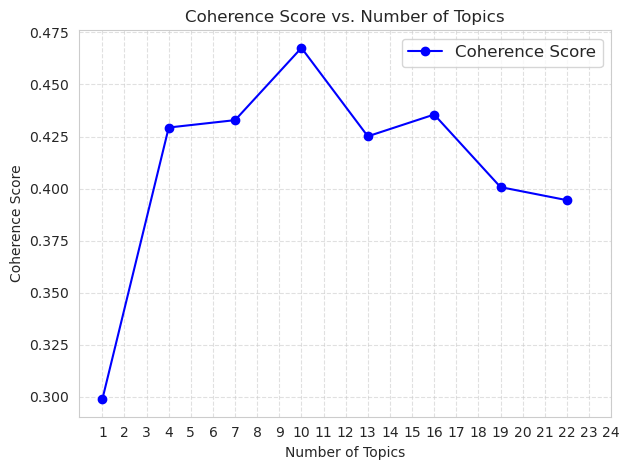

In [14]:
import matplotlib.pyplot as plt
import numpy as np

limit = 25
start = 1
step = 3
x = range(start, limit, step)

plt.plot(x, coherence_values, marker='o', color='b', label='Coherence Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.legend(fontsize=12)
plt.xticks(np.arange(1, 25, 1))
plt.tight_layout()
plt.savefig('unigram.pdf',bbox_inches='tight',dpi=900)
plt.show()

In [32]:
import gensim
from tqdm import tqdm
# LDA = gensim.models.ldamulticore.LdaMulticore

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                num_topics=10,
                random_state=256,
                chunksize=600,
                passes=14,
                per_word_topics=True)


In [33]:
lda_model.print_topics()

[(0,
  '0.054*"मेयर" + 0.019*"बालेन" + 0.018*"काठमाडौं" + 0.014*"स्थापित" + 0.012*"केशव" + 0.012*"उम्मेदवार" + 0.010*"सिर्जना" + 0.010*"स्वतन्त्र" + 0.007*"शाह" + 0.007*"उपमेयर"'),
 (1,
  '0.068*"देउवा" + 0.035*"प्रधानमन्त्री" + 0.016*"सभापति" + 0.014*"नेपाली" + 0.012*"शेरबहादुर" + 0.008*"चुनावी" + 0.007*"गठबन्धन" + 0.006*"देउवाले" + 0.006*"प्रचण्ड" + 0.005*"सम्बोधन"'),
 (2,
  '0.039*"एमाले" + 0.019*"भोट" + 0.011*"पार्टी" + 0.008*"कांग्रेस" + 0.008*"देश" + 0.007*"गठबन्धन" + 0.006*"काङ्ग्रेस" + 0.006*"नेपाली" + 0.004*"चुनाव" + 0.003*"नेता"'),
 (3,
  '0.026*"फिर्ता" + 0.025*"उम्मेदवारी" + 0.008*"लिए" + 0.007*"बागी" + 0.007*"लिन" + 0.006*"गठबन्धनको" + 0.005*"मतदाता" + 0.005*"निर्णय" + 0.005*"गठबन्धन" + 0.004*"जनाले"'),
 (4,
  '0.048*"एमाले" + 0.029*"विजयी" + 0.027*"नगरपालिका" + 0.024*"नेकपा" + 0.023*"नेपाली" + 0.022*"कांग्रेस" + 0.022*"वडा" + 0.019*"मत" + 0.017*"मेयर" + 0.016*"माओवादी"'),
 (5,
  '0.029*"नेपाल" + 0.023*"नेपाली" + 0.010*"एमाले" + 0.008*"जय" + 0.005*"ओली" + 0.005*"केपी" + 0.

In [34]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.115550066394203

Coherence Score:  0.45959535097648363


In [31]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
# Visualize the topics

# Visualize the topics
# fig, ax = plt.subplots(figsize=(30, 30))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = corpus_matrix, dictionary = id2word)
pyLDAvis.save_html(vis, 'topic=4.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.088432 -0.107713       1        1  29.144141
2     -0.264481 -0.008568       2        1  26.732959
1      0.097034 -0.107032       3        1  23.692305
3      0.079015  0.223312       4        1  20.430595, topic_info=          Term          Freq         Total Category  logprob  loglift
118   निर्वाचन   9935.000000   9935.000000  Default  30.0000  30.0000
3        एमाले  11618.000000  11618.000000  Default  29.0000  29.0000
21         भोट  12588.000000  12588.000000  Default  28.0000  28.0000
121    स्थानीय   4237.000000   4237.000000  Default  27.0000  27.0000
51       देउवा   4113.000000   4113.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1102      हजार    516.257185   1616.285384   Topic4  -5.8647   0.4469
90          मत    541.737344   3341.312447   Topic4  -5.8165  -0.2312
243     प्रयोग    345.961179    522.561550   Topic4  -6.2649   1.1757
124    गठबन्धन    391.482405   2441.359530   Topic4  -6.1413  -0.2422
63       चुनाव    391.901792   2742.832116   Topic4  -6.1402  -0.3576

[289 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6365      2  0.994792       =
6365      3  0.004306       =
711       1  0.001191  अग्रता
711       2  0.997879  अग्रता
2270      4  0.997142  अधिकृत
...     ...       ...     ...
7861      3  0.988324  हाल्यो
529       1  0.696356     हैन
529       2  0.017124     हैन
529       3  0.265414     हैन
529       4  0.020929     हैन

[521 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [121]:
import csv
import pandas as pd
from collections import Counter

def generate_word_csv(lda_model, dictionary, num_words=50):
    # Combine all tokens from the dataset into a single list
    all_tokens = [token for tokens in bag_of_words for token in tokens]

    # Count the occurrences of each word in the full dataset
    word_counts = Counter(all_tokens)

    # Save the word counts to a CSV file
    with open("Word_count_full_dataset.csv", mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # writer.writerow(['Word', 'Count'])
        writer.writerows(word_counts.items())

    # Generate CSV files for each topic containing word counts
    topics = lda_model.show_topics(num_topics=3, num_words=num_words, formatted=False)

    for topic_id, topic_words in topics:
        topic_words_dict = dict(topic_words)
        topic_words_list = [(word_counts[word],word) for word in topic_words_dict]

        df = pd.DataFrame(topic_words_list,columns=['Word', 'Count'])
        df.sort_values(["Word"], axis=0, ascending=[False],inplace=True)
        df.to_csv(f"unigram_topic_{topic_id+1}.csv",index=False,header=False)

generate_word_csv(lda_model,id2word, num_words=50)

In [13]:
from wordcloud import WordCloud
import warnings
import re
from PIL import Image

font = "Mangal.otf"
mask = np.array(Image.open('ellipse.png'))


def generate_word_clouds(lda_model, num_topics=7, num_words=50):
    # Suppress WordCloud warnings
    warnings.filterwarnings("ignore")

    # Generate word clouds for each topic
    topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)

    # Define a list of colors for each topic
    colors = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greens', 'Blues']

    for idx, (topic_id, topic_words) in enumerate(topics):
        nepali_topic_words = {word: count for word, count in topic_words if re.findall("[\u0900-\u097F]+", word)}
        print(f"Frequency of words in topic {topic_id}:")
        for word, count in nepali_topic_words.items():
            print(f"{word}: {count}")
        # wordcloud = WordCloud(width=800, height=600, background_color='white', mask=mask, font_path=font,
        #                       colormap=colors[idx % len(colors)], ).generate_from_frequencies(dict(nepali_topic_words))
        # 
        # # Display the word cloud
        # plt.figure(figsize=(10, 8))
        # plt.imshow(wordcloud, interpolation='bilinear'),
        # #plt.title(f"Word Cloud for Topic {topic_id+1}",fontsize=20)
        # plt.axis("off")
        # 
        # plt.savefig(f"wordcloud_topic_{topic_id + 1}.png", bbox_inches='tight', pad_inches=0)
        # 
        # plt.show()


# Call the function to generate word clouds
generate_word_clouds(lda_model, num_topics=3, num_words=50)



Frequency of words in topic 0:
निर्वाचन: 0.03078913316130638
भोट: 0.02759045548737049
स्थानीय: 0.011239797808229923
मेयर: 0.007834255695343018
चुनाव: 0.006345618050545454
मतदान: 0.005222718231379986
तह: 0.005035084672272205
बालेन: 0.004437156952917576
दिन: 0.00438486086204648
उम्मेदवारी: 0.003814290976151824
आयोगले: 0.003781608771532774
मत: 0.0037466047797352076
हजार: 0.0033893929794430733
काठमाडौं: 0.0027613479178398848
हाल्न: 0.0027422672137618065
काम: 0.002646607579663396
स्थापित: 0.0025792953092604876
स्वतन्त्र: 0.002571264049038291
उम्मेदवार: 0.002536888001486659
मतदाता: 0.002520997077226639
आयोग: 0.002403110498562455
आज: 0.0023483119439333677
केशव: 0.002278005937114358
कति: 0.002235696418210864
दल: 0.0020707640796899796
जनप्रतिनिधि: 0.002010480733588338
लाख: 0.0019939234480261803
सिर्जना: 0.0019425409846007824
एउटा: 0.0018636005697771907
आचारसंहिता: 0.0018622075440362096
निर्वाचनमा: 0.0017964532598853111
तहको: 0.0017947634914889932
भयो: 0.0017619538120925426
चुनावमा: 0.0017418283